<a href="https://colab.research.google.com/github/HarshanBathini/Medical-chatbot-LLM-/blob/main/Medical_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df_disease = pd.read_csv('/content/Training.csv')
df_disease = pd.read_csv('/content/Testing.csv')


Section 2: Data Cleaning & Preprocessing

In [ ]:
print(df_disease.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [ ]:
print(df_disease.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB
None


In [ ]:
df_disease.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.166667,0.190476,0.023810,0.047619,0.023810,0.166667,0.142857,0.047619,0.047619,0.023810,...,0.023810,0.023810,0.023810,0.047619,0.023810,0.023810,0.023810,0.023810,0.047619,0.023810
std,0.377195,0.397437,0.154303,0.215540,0.154303,0.377195,0.354169,0.215540,0.215540,0.154303,...,0.154303,0.154303,0.154303,0.215540,0.154303,0.154303,0.154303,0.154303,0.215540,0.154303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_disease.isnull().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


In [ ]:
df_disease.duplicated().sum()

np.int64(0)

In [ ]:
df_disease.shape

(42, 133)

In [ ]:
(df_disease.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [ ]:
df_disease = df_disease.fillna(0).drop_duplicates()

Section 3: Exploratory Data Analysis (EDA)

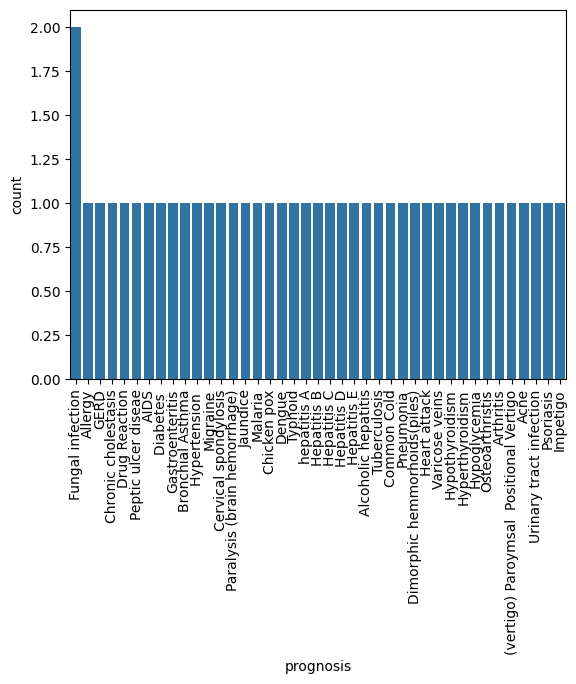

In [ ]:
sns.countplot(x='prognosis', data=df_disease)
plt.xticks(rotation=90)
plt.show()

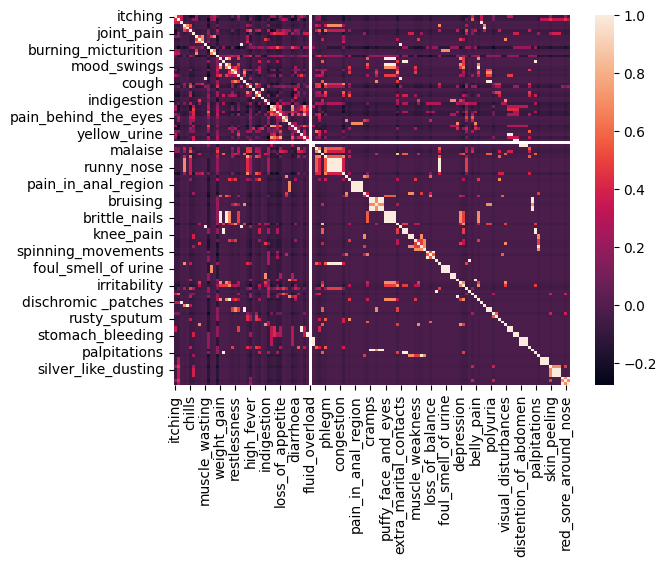

In [ ]:
corr = df_disease.drop(['prognosis'], axis=1).corr()
sns.heatmap(corr)
plt.show()

Section 4: Feature Engineering & Text Processing

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)
X_new = sel.fit_transform(df_disease.drop(['prognosis'], axis=1))

In [ ]:
le = LabelEncoder()
y = le.fit_transform(df_disease['prognosis'])

Section 5: Machine Learning Model Development

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)


RandomForestClassifier()

Section 6: Natural Language Processing Implementation

In [ ]:
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    tokens = nltk.word_tokenize(text)
    return [lemmatizer.lemmatize(t.lower()) for t in tokens]

In [ ]:
def get_response(user_input, intents):
    user_tokens = clean_text(user_input)
    for intent in intents['intents']:
        for pattern in intent['patterns']:
            pattern_tokens = clean_text(pattern)
            if set(pattern_tokens).intersection(set(user_tokens)):
                return np.random.choice(intent['responses'])
    return "I'm sorry, I don't understand that. Please consult a physician for critical symptoms."


In [ ]:
import json

try:
    with open('/content/intents.json') as f:
        chatbot_intents = json.load(f)
except FileNotFoundError:
    print("Error: intents.json not found. Please upload the intents.json file to the /content/ directory.")
except json.JSONDecodeError:
    print("Error: Could not decode intents.json. Please ensure the file contains valid JSON.")

In [ ]:
user_input = "I have a fever and sore throat"
print(get_response(user_input, chatbot_intents))

Remove any stingers immediately. Some experts recommend scraping out the stinger with a credit card. Applying ice to the site may provide some mild relief. Apply ice for 20 minutes once every hour as needed. Wrap the ice in a towel or keep a cloth between the ice and skin to keep from freezing the skin. Taking an antihistamine such as diphenhydramine (Benadryl) or a nonsedating one such as loratadine (Claritin) will help with itching and swelling. Take acetaminophen (Tylenol) or ibuprofen (Motrin)for pain relief as needed. Wash the sting site with soap and water. Placing hydrocortisone cream on the sting can help relieve redness, itching, and swelling.


The error `NameError: name 'chatbot_intents' is not defined` in the previous cell occurs because the variable `chatbot_intents` was used in the `get_response` function call before it was assigned a value. This variable is expected to hold the data for the chatbot's intents.

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Section 7: Model Evaluation & Statistical Analysis

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

                              precision    recall  f1-score   support

                 Common Cold       0.00      0.00      0.00       1.0
               Drug Reaction       0.00      0.00      0.00       1.0
             Gastroenteritis       0.00      0.00      0.00       1.0
                Heart attack       0.00      0.00      0.00       1.0
Paralysis (brain hemorrhage)       0.00      0.00      0.00       1.0
                   Psoriasis       0.00      0.00      0.00       1.0
                Tuberculosis       0.00      0.00      0.00       1.0
              Varicose veins       0.00      0.00      0.00       1.0
                 hepatitis A       0.00      0.00      0.00       1.0

                   micro avg       0.00      0.00      0.00       9.0
                   macro avg       0.00      0.00      0.00       9.0
                weighted avg       0.00      0.00      0.00       9.0



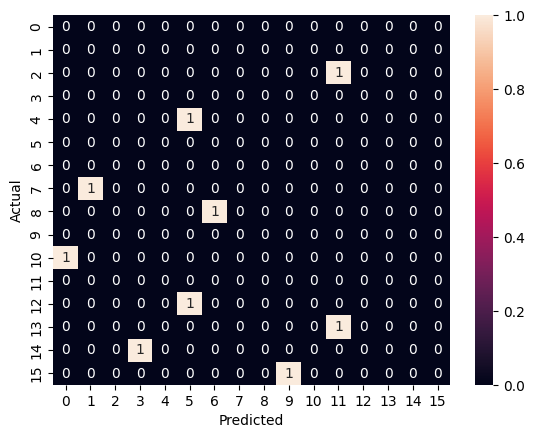

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.inverse_transform(np.unique(y_test)), labels=np.unique(y_test)))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Section 8: Data Visualization Dashboard

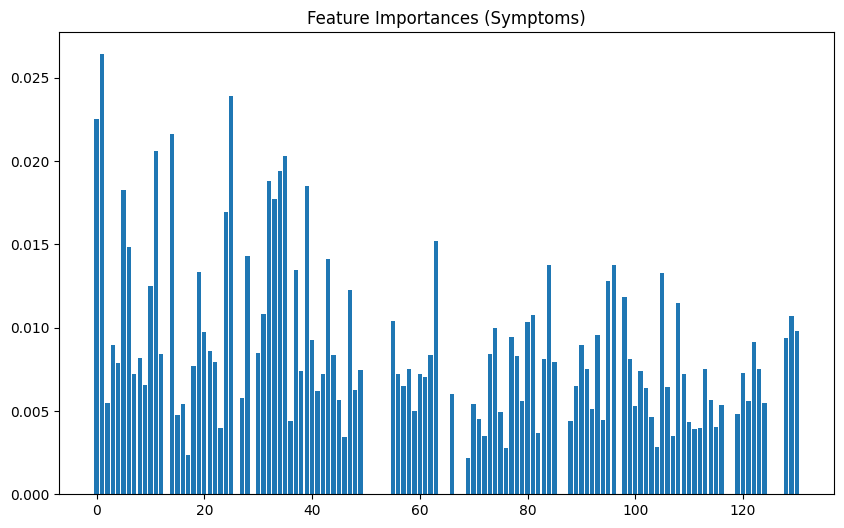

In [ ]:
# Visualize feature importances
importances = clf.feature_importances_
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(importances)), importances)
plt.title("Feature Importances (Symptoms)")
plt.show()


Section 9: Chatbot Interface Development

In [ ]:
# Simple command-line/text interface in Colab
while True:
    query = input("USER: ")
    if query.lower() == "quit":
        break

    # Preprocess the user input to match the model's feature format
    # This is a placeholder and needs to be replaced with actual preprocessing based on your data
    # For example, creating a one-hot encoded vector of symptoms
    # For demonstration, we'll create a dummy feature vector
    # In a real application, you would need to map symptoms from user input to the model's features
    # This part requires significant domain knowledge and a structured way to extract symptoms from free text.

    # Dummy feature vector creation (replace with actual symptom extraction and encoding)
    # This assumes X_new is accessible and represents the features the model was trained on.
    # A more robust approach would involve a symptom vocabulary and a function to convert text to the feature vector.
    dummy_features = np.zeros(X_new.shape[1]) # Assuming X_new has the correct number of features
    # Example: If 'fever' is the 10th feature in X_new, and the user says "I have a fever", you would set dummy_features[9] = 1.
    # This mapping logic is not implemented here as it's highly dependent on the dataset and symptom representation.

    # Use the trained model to predict the disease
    # Ensure 'clf' (the trained model) is accessible in this scope.
    try:
        predicted_disease_index = clf.predict([dummy_features])
        predicted_disease = le.inverse_transform(predicted_disease_index)[0]
        print(f"Based on your symptoms, you might have: {predicted_disease}")
    except NameError:
        print("Error: Model or label encoder not found. Please ensure 'clf' and 'le' are defined.")
    except ValueError as e:
         print(f"Error during prediction: {e}. Ensure the input features match the model's expected format.")


    # Use the chatbot intents for general responses (optional, depending on desired interaction)
    print("BOT (General Advice):", get_response(query, chatbot_intents))